In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify

In [2]:
fp = 'L4_data/TravelTimes_to_5975375_RailwayStation_Helsinki.geojson'

acc = gpd.read_file(fp)
acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6..."


In [3]:
acc = acc.loc[acc['pt_r_tt'] >= 0]

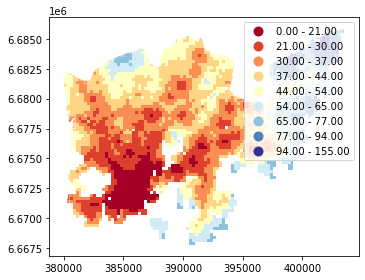

In [8]:
acc.plot(column="pt_r_tt", scheme="Natural_Breaks", k=9, cmap="RdYlBu", linewidth=0, legend=True)
plt.tight_layout()

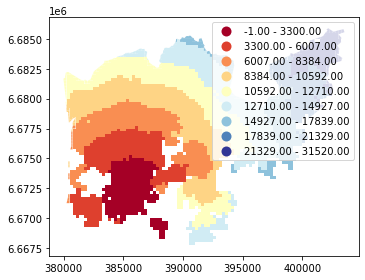

In [9]:
acc.plot(column="walk_d", scheme="Natural_Breaks", k=9, cmap="RdYlBu", linewidth=0, legend=True)
plt.tight_layout()

# Applying classifiers to data

In [12]:
mapclassify.NaturalBreaks(y=acc['pt_r_tt'], k=9)

NaturalBreaks           

    Interval       Count
------------------------
[  0.00,  21.00] |   263
( 21.00,  30.00] |   529
( 30.00,  36.00] |   650
( 36.00,  43.00] |   835
( 43.00,  53.00] |   688
( 53.00,  65.00] |   423
( 65.00,  78.00] |   202
( 78.00,  95.00] |   163
( 95.00, 155.00] |    54

In [13]:
mapclassify.Quantiles(y=acc['pt_r_tt'])

Quantiles               

    Interval       Count
------------------------
[  0.00,  30.00] |   792
( 30.00,  37.00] |   779
( 37.00,  44.00] |   821
( 44.00,  56.00] |   685
( 56.00, 155.00] |   730

In [14]:
classifier = mapclassify.NaturalBreaks.make(k=9)

In [21]:
classifications = acc[['pt_r_tt']].apply(classifier)
classifications

,pt_r_tt
0,8
1,7
2,8
3,8
4,8
...,...
3821,5
3822,6
3823,6
3824,6


In [23]:
acc['nb_pt_r_tt'] = acc[['pt_r_tt']].apply(classifier)
acc[['pt_r_tt', 'nb_pt_r_tt']].head()

,pt_r_tt,nb_pt_r_tt
0,99,8
1,93,7
2,146,8
3,155,8
4,99,8


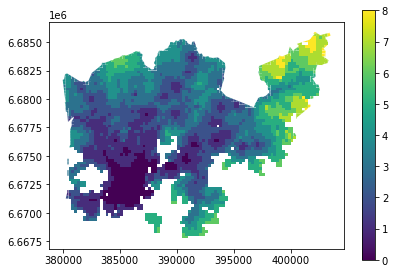

In [24]:
acc.plot(column="nb_pt_r_tt", linewidth=0, legend=True)
plt.tight_layout()

# Plotting a histogram

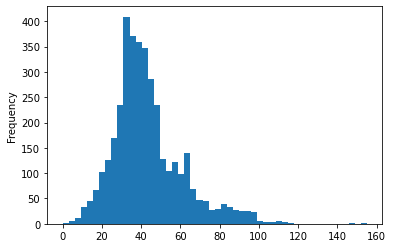

In [26]:
acc['pt_r_tt'].plot.hist(bins=50);

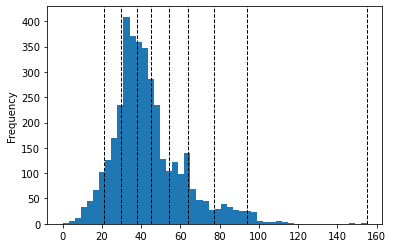

In [27]:
classifier = mapclassify.NaturalBreaks(y=acc['pt_r_tt'], k=9)
acc['pt_r_tt'].plot.hist(bins=50)
for value in classifier.bins:
    plt.axvline(value, color='k', linestyle='dashed', linewidth=1)

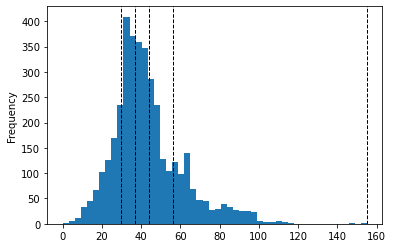

In [28]:
classifier = mapclassify.Quantiles(y=acc['pt_r_tt'])
acc['pt_r_tt'].plot.hist(bins=50)
for value in classifier.bins:
    plt.axvline(value, color='k', linestyle='dashed', linewidth=1)

# Creating a custom classifier

In [31]:
def custom_classifier(row, src_col1, src_col2, threshold1, threshold2, output_col):
    # 1. If the value in src_col1 is LOWER than the threshold1 value
    # 2. AND the value in src_col2 is HIGHER than the threshold2 value, give value 1, otherwise give 0
    if row[src_col1] < threshold1 and row[src_col2] > threshold2:
        # Update the output column with value 0
        row[output_col] = 1
    # If area of input geometry is higher than the threshold value update with value 1
    else:
        row[output_col] = 0
    # Return the updated row
    return row

In [32]:
# travel time is lower or equal to 20 minutes 
# they are further away than 4 km (4000 meters) from city center.
acc["suitable_area"] = None
acc = acc.apply(custom_classifier, src_col1='pt_r_tt',
                src_col2='walk_d', threshold1=20, threshold2=4000,
                output_col="suitable_area", axis=1)
acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,...,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry,nb_pt_r_tt,suitable_area
0,29476,41,29483,46,5876274,29990,76,95,24984,77,...,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6...",8,0
1,29456,41,29462,46,5876275,29866,74,95,24860,75,...,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6...",7,0
2,36772,50,36778,56,5876278,33541,116,137,44265,130,...,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6...",8,0
3,36898,49,36904,56,5876279,33720,119,141,44444,132,...,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6...",8,0
4,29411,40,29418,44,5878128,29944,75,95,24938,76,...,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6...",8,0


In [33]:
acc['suitable_area'].value_counts()

0    3798
1       9
Name: suitable_area, dtype: int64

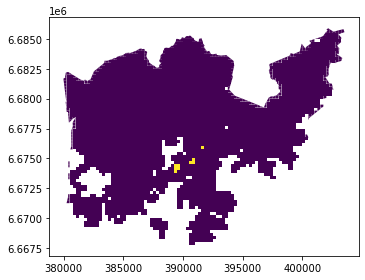

In [34]:
acc.plot(column="suitable_area", linewidth=0)
plt.tight_layout()